## Capstone Project: Analysis of Road Accidents in Catalonia

#### Applied Data Science Capstone by IBM/Coursera

### Table of Contents
1. [Introduction](#introduction)
2. [Data](#data)
3. [Methodology: Exploratory Data Analysis](#analysis)
4. [Methodology: Machine Learning models](#models)
5. [Methodology: Hazard ratio estimation](#estimation)
6. [Results and Discussion](#results)
7. [Conclusion](#conclusion)

### Introduction <a name="introduction"></a>

The number of people driving the roads every day is enormous. This leads to the high importance of road safety since road injuries are one of the most common causes of accidental death. However, improving road conditions also requires a lot of resources, which makes it necessary to take a systematic approach to determine which roads are more dangerous and need immediate attention.

An effective way to define the actual riskiness of the specific road is to analyze data about road accidents. This project aims to **find features that affect road safety negatively, weigh their importance, conduct a statistical analysis of the current state of the roads, as well as suggest options for improvements**. 

It is obviously interesting for car drivers and citizens in general. Besides, this analysis can be useful for people responsible for future road improvements. The traffic police also may be interested in this analysis, since it identifies the conditions that require additional attention.


### Data <a name="data"></a>

For this analysis, I have used Catalonia Road Traffic Injuries & Deaths dataset from Kaggle ([link](https://www.kaggle.com/jordigarciacastillon/road-traffic-injuries-deaths-catalonia-201020)), which consists of data from 2010 to 2020. For convenience, this dataset, as well as the results of its processing, will be placed in my GitHub repository.

First of all, this dataset needs to be translated.

In [2]:
import pandas as pd
df=pd.read_csv("https://raw.githubusercontent.com/secondaryemotion/Coursera_Capstone/master/acc_catalonia_data.csv")
df.columns=['YEAR', 'AREA', 'DATE', 'ROAD', 'KM', 'CITY', 'COUNTY', 'DEMARCATION','N_DEATHS', 'N_MAJ_INJURIES', 'N_MIN_INJURIES', 'N_VICTIMS','N_VEHICLES', 'N_PEDESTRIANS','N_BICYCLES', 'N_MOPEDS','N_MOTORCYCLES', 'N_LIGHT_VEHICLES','N_HEAVY_VEHICLES', 'N_OTHER_TYPES','N_UNKNOWN_TYPE', 'ALLOWED_SPEED', 'LEAK','FOG', 'TERRAIN', 'SPECIAL_LANE','SPECIAL_MEASURES', 'CLIMATOLOGY', 'SPECIAL_FUNCTION','SEVERITY', 'FOG_INFLUENCE', 'TERRAIN_INFLUENCE','TRAFFIC_INFLUENCE', 'WEATHER_INFLUENCE', 'WIND_INFLUENCE','LUMINOSITY_INFLUENCE', 'SPECIAL_MEASURES_INFLUENCE', 'OBJECT_INFLUENCE','FURROWS_INFLUENCE', 'VISIBILITY_INFLUENCE', 'INTERSECTION','SPEED_LIMIT_DISPLAY', 'LIGHT_CONDITIONS', 'REGULATION_OF_PRIORITY','TRACK_TRAJECTORIES', 'ACC_CLASSIFICATION', 'TYPE_OF_SECTION', 'AREA_CLASSIFICATION','ROAD_STATE', 'ROAD_TYPE', 'ROAD_OWNERSHIP','ALTIMETRIC_LAYOUT', 'WIND_CLASSIFICATION', 'WORKING_DAY', 'TIME', 'TIME_SLOT','ACC_TYPE', 'WEEKDAY']
df=df.replace({'No':'No','Si':'Yes','Sense especificar':'Not specified',"No n'hi ha":"No",'Sense Especificar':'Not specified'})
df["AREA"]=df["AREA"].replace({'Zona urbana': 'Urban area','Carretera': 'Road'})
df["TERRAIN"]=df["TERRAIN"].replace({'Desmunt':'Disassembled','A nivell':'Plane','Sense Especificar':'Not specified','Mixt':'Mixed','Terraplé':'Embankment'})
df["SPECIAL_LANE"]=df["SPECIAL_LANE"].replace({"No n'hi ha":"No", 'Carril habilitat en sentit contrari habitual':'Lane enabled in the opposite direction than usual','Habilitació voral/carril addicional':'Additional curb / lane clearance','Carril lent':'Slow lane', "Carril d'alentiment":'Slowdown lane','Altres':'Others','Carril bus':'Bus lane','Carril central':'Central lane','Carril bici':'Cycling lane','Carril avançament':'Overtaking lane','Carril reversible':'Reversible lane','Carril acceleració':'Acceleration lane'})
df["SPECIAL_MEASURES"]=df["SPECIAL_MEASURES"].replace({"No n'hi ha":"No",'Obres':'Works','Serveis de neteja o manteniment':'Cleaning or maintenance services','Esdeveniment extraordinari':'Extraordinary event','Accident trànsit anterior':'Previous traffic accident','Cons':'Built','Control policial':'Police control'})
df["CLIMATOLOGY"]=df["CLIMATOLOGY"].replace({'Bon temps':'Good weather','Pluja forta':'Heavy rain','Pluja dèbil':'Light rain','Nevant':'Snowing','Calamarsa':'Hail'})
df["SPECIAL_FUNCTION"]=df["SPECIAL_FUNCTION"].replace({'Sense funció especial':'No special function','Variant':'Alternative','Travessera':'Crossing','Ronda, cinturo o circumval.lacio':'Round, waist or circumvallation'})
df["SEVERITY"]=df["SEVERITY"].replace({'Accident greu':'Serious accident','Accident mortal':'Fatal accident'})
df["INTERSECTION"]=df["INTERSECTION"].replace({'Arribant o eixint intersecció fins 50m':'Arriving or leaving intersection up to 50m','Dintre intersecció':'Inside intersection','En secció':'In section'})
df["SPEED_LIMIT_DISPLAY"]=df["SPEED_LIMIT_DISPLAY"].replace({'Genérica via':'Generic way','Senyal velocitat':'Speed signal'})
df["LIGHT_CONDITIONS"]=df["LIGHT_CONDITIONS"].replace({'De nit, il·luminació artificial suficient':'At night, enough artificial lighting','De dia, dia clar':'Day, clear day','De nit, sense llum artificial':'At night, without artificial light','De dia, dia fosc':'Day, dark day','Alba o capvespre':'Dawn or dusk','De nit, il·luminació artificial insuficient':'At night, insufficient artificial lighting'})
df["REGULATION_OF_PRIORITY"]=df["REGULATION_OF_PRIORITY"].replace({'Sols norma prioritat de pas':'Only standart way','Senyal Stop o cedeix pas':'Stop signal or give way','Semàfor':'Traffic light','Sols marques viàries (inclou pas vianants)':'Road markings only (includes pedestrian crossing)','Persona autoritzada':'Authorized person','Altres':'Others'})
df["TRACK_TRAJECTORIES"]=df["TRACK_TRAJECTORIES"].replace({'Un sol sentit':'One way','Doble sentit':'Double way'})
df["ACC_CLASSIFICATION"]=df["ACC_CLASSIFICATION"].replace({'Encalç':'Chase','Resta sortides de via':'Other road departures','Col·lisió frontal':'Front collision','Envestida (frontal lateral)':'Onslaught (front side)','Caiguda en la via':'Fall on the road','Atropellament':'Run over','Fregament o col·lisió lateral':'Friction or side collision','Xoc contra objecte/obstacle sense sortida prèvia de via':'Collision against object / obstacle without previous derailment','Altres':'Others','Sortida de via amb xoc o col·lisió':'Derailment with collision or clash','Sortida de via amb bolcada':'Derailment with dump','Sortida de via amb atropellament':'Derailment with collision','Xoc amb animal a la calçada':'Collision with animal on the road'})
df["TYPE_OF_SECTION"]=df["TYPE_OF_SECTION"].replace({'Intersecció en T o Y':'T or Y intersection','Giratòria':'Rotary','Encreuament o intersecció en X o +':'Crossing or intersection at X or +',"Enllaç d'entrada o eixida":"Entry or exit",'Pas a nivell':'Level crossing'})
df["AREA_CLASSIFICATION"]=df["AREA_CLASSIFICATION"].replace({'Zona urbana': 'Urban area','Carretera': 'Road','Travessera':'Crossing'})
df["ROAD_STATE"]=df["ROAD_STATE"].replace({'Sec i net':'Dry and clean','Relliscós':'Slippery','Mullat':'Wet','Inundat':'Flooded','Nevat':'Snowy','Gelat':'Icy'})
df["ROAD_TYPE"]=df["ROAD_TYPE"].replace({'Via urbana( inclou carrer i carrer residencial)':'Urban road (includes street and residential street)','Carretera convencional':'Conventional road','Altres':'Others','Autopista':'Highway', 'Autovia':'Freeway', 'Camí rural/pista forestal':'Rural road / forest track'})
df['ROAD_OWNERSHIP']=df['ROAD_OWNERSHIP'].replace({'Estatal':'State','Municipal':'Municipal','Autonòmica':'Autonomous','Provincial':'Provincial','Altres':'Others'})
df["ALTIMETRIC_LAYOUT"]=df["ALTIMETRIC_LAYOUT"].replace({'Pla':'Flat','Rampa o pendent':'Ramp or slope','Canvi rasant':'Ground change', 'Gual':'Ford'})
df["WIND_CLASSIFICATION"]=df["WIND_CLASSIFICATION"].replace({'Calma, vent molt suau':'Calm, very gentle wind','Vent moderat':'Moderate wind','Vent fort':'Strong wind'})
df["WORKING_DAY"]=df["WORKING_DAY"].replace({'Feiners':'Workdays','CapDeSetmana':'Weekend'})
df["TIME_SLOT"]=df["TIME_SLOT"].replace({'Nit':'Night', 'Tarda':'Afternoon','Matí':'Morning'})
df["ACC_TYPE"]=df["ACC_TYPE"].replace({'Col.lisió de vehicles en marxa':'Collision of vehicles in motion','Sortida de la calcada sense especificar':'Unspecified track exit','Bolcada a la calcada':'Dump on the track', 'Atropellament':'Run over',"Col.lisió d'un vehicle contra un obstacle de la calcada":"Collision of a vehicle against a road obstacle",'Altres':'Others'})
df["WEEKDAY"]=df["WEEKDAY"].replace({'dill-dij':'mon-thu','dg':'sun','dis':'sat','div':'fri'})
print('Done!')

Done!


There is a lot of missing values in some additional attributes like allowed speed, regulation of priority, type of section and so on. they need to be replaced with 'Not specified'. Then we change the datatype of *‘ALLOWED_SPEED’* column from float to string. Also, value '999' in the *‘ALLOWED_SPEED’* needs to be replaced with ‘Not specified’.

In [3]:
df['ALLOWED_SPEED']=df['ALLOWED_SPEED'].astype(str)
df['ALLOWED_SPEED']=df['ALLOWED_SPEED'].replace({'999.0':'Not specified'})
df=df.replace({'nan':'Not specified'})
df=df.fillna('Not specified')
print('Done!')

Done!


This dataset has a huge number of features, so an important task is to sort essential features from irrelevant ones. We can do it by finding the number of unique values in each column.

In [4]:
df.shape

(16774, 58)

In [5]:
df.nunique()

YEAR                             9
AREA                             2
DATE                          3257
ROAD                           679
KM                            2150
CITY                           854
COUNTY                          42
DEMARCATION                      4
N_DEATHS                         8
N_MAJ_INJURIES                  11
N_MIN_INJURIES                  19
N_VICTIMS                       21
N_VEHICLES                      15
N_PEDESTRIANS                    7
N_BICYCLES                       9
N_MOPEDS                         4
N_MOTORCYCLES                    7
N_LIGHT_VEHICLES                12
N_HEAVY_VEHICLES                 7
N_OTHER_TYPES                    4
N_UNKNOWN_TYPE                   1
ALLOWED_SPEED                   16
LEAK                             3
FOG                              2
TERRAIN                          5
SPECIAL_LANE                    13
SPECIAL_MEASURES                 8
CLIMATOLOGY                      6
SPECIAL_FUNCTION    

Since the total number of entries in this dataset is 16774, there is no benefit in using features *‘CITY’*, *‘TIME’*, *‘KM’* in further analysis. *'ROAD'* feature will be useful later, so we'll save it in a different copy of this dataset.

*'DATE'* will be replaced with *'MONTH'*, and a list of features with data, which can be obtained only after the accident, will be dropped.

In [6]:
pd.options.mode.chained_assignment = None
df['DATE'] = pd.to_datetime(df['DATE'],format='%d/%m/%Y')
df['MONTH'] = pd.Series(int)
for id,item in enumerate(df['DATE']):
    df['MONTH'].iloc[id]=item.month
    
roaddf=df[['AREA', 'MONTH','ROAD', 'COUNTY', 'DEMARCATION','N_DEATHS', 'N_MAJ_INJURIES', 'ALLOWED_SPEED', 'FOG', 'TERRAIN', 'SPECIAL_LANE','SPECIAL_MEASURES', 'CLIMATOLOGY', 'SPECIAL_FUNCTION','INTERSECTION', 'LIGHT_CONDITIONS', 'REGULATION_OF_PRIORITY','TRACK_TRAJECTORIES', 'TYPE_OF_SECTION', 'AREA_CLASSIFICATION','ROAD_STATE', 'ROAD_TYPE', 'ROAD_OWNERSHIP','ALTIMETRIC_LAYOUT', 'WIND_CLASSIFICATION', 'TIME_SLOT','WEEKDAY']]
maindf=df[['AREA', 'MONTH','COUNTY', 'DEMARCATION','N_DEATHS', 'N_MAJ_INJURIES', 'ALLOWED_SPEED', 'FOG', 'TERRAIN', 'SPECIAL_LANE','SPECIAL_MEASURES', 'CLIMATOLOGY', 'SPECIAL_FUNCTION','INTERSECTION', 'LIGHT_CONDITIONS', 'REGULATION_OF_PRIORITY','TRACK_TRAJECTORIES', 'TYPE_OF_SECTION', 'AREA_CLASSIFICATION','ROAD_STATE', 'ROAD_TYPE', 'ROAD_OWNERSHIP','ALTIMETRIC_LAYOUT', 'WIND_CLASSIFICATION', 'TIME_SLOT','WEEKDAY']]
print('Done!')

Done!


In [7]:
maindf.head()

,AREA,MONTH,COUNTY,DEMARCATION,N_DEATHS,N_MAJ_INJURIES,ALLOWED_SPEED,FOG,TERRAIN,SPECIAL_LANE,...,TRACK_TRAJECTORIES,TYPE_OF_SECTION,AREA_CLASSIFICATION,ROAD_STATE,ROAD_TYPE,ROAD_OWNERSHIP,ALTIMETRIC_LAYOUT,WIND_CLASSIFICATION,TIME_SLOT,WEEKDAY
0,Urban area,1,Valles Oriental,Barcelona,0,1,100.0,No,Disassembled,No,...,One way,T or Y intersection,Urban area,Dry and clean,Urban road (includes street and residential st...,Not specified,Not specified,"Calm, very gentle wind",Night,mon-thu
1,Road,10,Segria,Lleida,0,1,40.0,No,Plane,No,...,Double way,Rotary,Road,Dry and clean,Conventional road,State,Flat,"Calm, very gentle wind",Night,sun
2,Road,5,Girones,Girona,1,0,80.0,No,Plane,No,...,Double way,Not specified,Road,Dry and clean,Conventional road,State,Ramp or slope,"Calm, very gentle wind",Afternoon,mon-thu
3,Urban area,8,Barcelones,Barcelona,0,2,100.0,No,Not specified,No,...,One way,Crossing or intersection at X or +,Urban area,Dry and clean,Urban road (includes street and residential st...,Not specified,Not specified,"Calm, very gentle wind",Night,sat
4,Urban area,5,Barcelones,Barcelona,0,1,100.0,No,Not specified,No,...,One way,Crossing or intersection at X or +,Urban area,Dry and clean,Urban road (includes street and residential st...,Not specified,Not specified,"Calm, very gentle wind",Afternoon,fri


To determine the strength of correlation between values, we need to convert them to a numerical format using LabelEncoder from sklearn library, calculate the Pearson coefficient and represent it as a heatmap. Also, we will show a list of the found relationships with the absolute value of the Pearson coefficient exceeding 0.7.

0.7232024920201996 0.0 AREA AREA_CLASSIFICATION
0.8843542220096519 0.0 AREA ROAD_TYPE
0.7232024920201996 0.0 AREA_CLASSIFICATION AREA
0.8735443956409672 0.0 AREA_CLASSIFICATION ROAD_TYPE
0.8843542220096519 0.0 ROAD_TYPE AREA
0.8735443956409672 0.0 ROAD_TYPE AREA_CLASSIFICATION


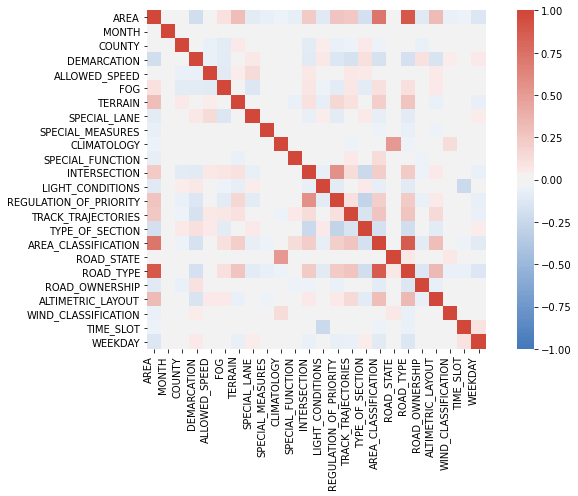

In [8]:
from sklearn import preprocessing
import seaborn as sns
import scipy.stats as stats
from scipy.stats.stats import pearsonr
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline 
from matplotlib.pyplot import figure

subdf = maindf.copy()
subdf.drop(columns=['N_DEATHS', 'N_MAJ_INJURIES'],inplace=True)
le = preprocessing.LabelEncoder()
for id,item in enumerate(subdf):
    le.fit(subdf[item])
    subdf[item]=le.transform(subdf[item])

subdf_cols=subdf.columns
size=(subdf_cols).size
coef=[[0 for i in range(size)] for j in range(size)]
pval=[[0 for i in range(size)] for j in range(size)]
for id,item in enumerate(subdf_cols):
    i=id
    for id,item2 in enumerate(subdf_cols):
        pcoef, p_value=stats.pearsonr(subdf[item],subdf[item2])
        coef[i][id]=pcoef
        pval[i][id]=p_value
        if (abs(pcoef)>0.7) & (item!=item2):
            print(pcoef, p_value, item, item2)
            
ax = plt.subplots(figsize=(10,7)) 
ax = sns.heatmap(
    coef, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(250, 15, n=200),
    square=True
)
ax.set_xticklabels(subdf, rotation=90, horizontalalignment='right')
ax.set_yticklabels(subdf, rotation=0, horizontalalignment='right')
xticks=range(size)
ax.set_yticks=range(size)
plt.tight_layout()

All three features are related. Values of *‘AREA’* and *‘AREA_CLASSIFICATION’* columns are close. Thus, the *‘AREA’* column can be dropped. The *‘ROAD_TYPE’* column can be dropped, too.

In [9]:
maindf.drop(columns=['AREA', 'ROAD_TYPE'], inplace=True)
print('Done!')

Done!


After all, there should be 22 features and 2 target variables in the dataset.

In [10]:
maindf.shape

(16774, 24)

### Methodology: Exploratory Data Analysis <a name="analysis"></a>

First, we need to determine the contribution of each road feature to the overall hazard ratio. We'll add a temporary column *'count'* to track the number of entries for every unique value of the features. Also, we need to pick out maximum values of hazard coefficient.

In [11]:
hazard_coefs={}
maindf['count']=1
df_col=maindf.columns.drop(labels=['N_DEATHS', 'N_MAJ_INJURIES','count'])
max_hazard=[0]*len(df_col)
for id,item in enumerate(df_col):
    hazard_coefs[id]=maindf.groupby([item],as_index=False).sum()
    hazard_coefs[id]['coef_deaths']=(hazard_coefs[id]['N_DEATHS'])/(hazard_coefs[id]['count'])
    hazard_coefs[id]['coef_maj_inj']=(hazard_coefs[id]['N_MAJ_INJURIES'])/(hazard_coefs[id]['count'])
    hazard_coefs[id]['hazard_coef']=hazard_coefs[id]['coef_deaths']+(hazard_coefs[id]['coef_maj_inj'])/2
    hazard_coefs[id].drop(labels=['N_DEATHS', 'N_MAJ_INJURIES','count','coef_maj_inj','coef_deaths'],axis=1,inplace=True)
    for i in range(len(hazard_coefs[id]['hazard_coef'])):
        if (hazard_coefs[id]['hazard_coef'][i] > max_hazard[id]):
            max_hazard[id]=hazard_coefs[id]['hazard_coef'][i]

From the maximum values of the coefficients, we determine the maximum possible value of the hazard coefficient, carry out normalization and use its results to determine the weight of each component of the coefficient. Individual values of hazard coefficient for each value are normalized to the weight of the coefficient component.

In [12]:
import copy
norm_hazard_coefs=copy.deepcopy(hazard_coefs)
max_haz_coef=sum(max_hazard)
weighted_max_hazard=[0]*len(df_col)
for i in range(len(df_col)):
    weighted_max_hazard[i]=max_hazard[i]/max_haz_coef

for i in range(len(df_col)):
    for j in range(len(hazard_coefs[i]['hazard_coef'])):
        norm_hazard_coefs[i]['hazard_coef'][j] =  hazard_coefs[i]['hazard_coef'][j]/max_hazard[i]*weighted_max_hazard[i]

Also, let's calculate the average contribution of each feature. 

In [13]:
average_hazard=[0]*len(df_col)
for i in range(len(df_col)):
    average_hazard[i]=norm_hazard_coefs[i]['hazard_coef'].mean()

We now have hazard coefficient values for all road features. Let's represent the influence of each feature on the total coefficient in the form of a graph.

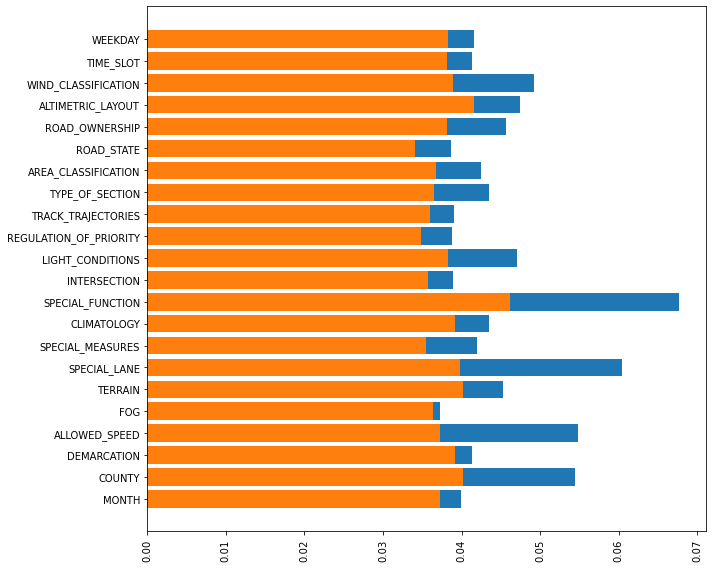

In [14]:
plt.figure(figsize=((10,8)))
plt.barh(df_col, weighted_max_hazard)
plt.barh(df_col, average_hazard)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Let's split features into three groups: road conditions, weather conditions, circumstances.

In [15]:
roadcon_col=['COUNTY','DEMARCATION','ALLOWED_SPEED','TERRAIN','SPECIAL_FUNCTION','TRACK_TRAJECTORIES','AREA_CLASSIFICATION','ROAD_OWNERSHIP']
weathcon_col=['FOG','CLIMATOLOGY','LIGHT_CONDITIONS','ROAD_STATE','WIND_CLASSIFICATION']
circumst_col=['MONTH','SPECIAL_MEASURES','INTERSECTION','REGULATION_OF_PRIORITY','TYPE_OF_SECTION','ALTIMETRIC_LAYOUT','TIME_SLOT','WEEKDAY','SPECIAL_LANE']

Now we need to create a separate group of hazard coefficients for every features list. Also we create a list of maximum coefficients.

In [16]:
roadcon={}
road_max_hazard=[0]*len(roadcon_col)
for id,item in enumerate(roadcon_col):
    roadcon[id]=hazard_coefs[df_col.get_loc(item)]
    for i in range(len(hazard_coefs[df_col.get_loc(item)])):
        if (roadcon[id]['hazard_coef'][i] > road_max_hazard[id]):
            road_max_hazard[id]=roadcon[id]['hazard_coef'][i].copy()
    
weathcon={}
weath_max_hazard=[0]*len(weathcon_col)
for id,item in enumerate(weathcon_col):
    weathcon[id]=hazard_coefs[df_col.get_loc(item)]
    for i in range(len(hazard_coefs[df_col.get_loc(item)])):
        if (weathcon[id]['hazard_coef'][i] > weath_max_hazard[id]):
            weath_max_hazard[id]=weathcon[id]['hazard_coef'][i].copy()
    
circumst={}
circumst_max_hazard=[0]*len(circumst_col)
for id,item in enumerate(circumst_col):
    circumst[id]=hazard_coefs[df_col.get_loc(item)]
    for i in range(len(hazard_coefs[df_col.get_loc(item)])):
        if (circumst[id]['hazard_coef'][i] > circumst_max_hazard[id]):
            circumst_max_hazard[id]=circumst[id]['hazard_coef'][i].copy()

Now we can demonstrate the contribution of each group of features to the hazard ratio in the form of a horizontal bar chart.

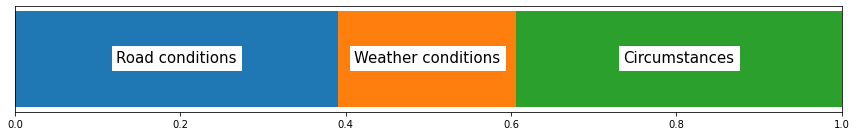

In [17]:
rmh=sum(road_max_hazard)
wmh=sum(weath_max_hazard)
cmh=sum(circumst_max_hazard)
totalmh=rmh+wmh+cmh

plt.figure(figsize=((12,2)))
labels=['']
plt.barh(labels, (rmh/totalmh), height=1)
plt.barh(labels, (wmh/totalmh), height=1, left=(rmh/totalmh))
plt.barh(labels, (cmh/totalmh), height=1, left=((rmh+wmh)/totalmh))
plt.xlim((0,1))
plt.tight_layout()
plt.tick_params(
    axis='y',          
    which='both',      
    left=False,      
    right=False,         
    labelbottom=False)
textbox=dict(boxstyle="square",
                   ec=(1., 1., 1.),
                   fc=(1., 1., 1.),
                   )
plt.text((rmh/totalmh)/2, 0.01, "Road conditions", size=15, ha="center", va="center", bbox=textbox)
plt.text((rmh/totalmh + (wmh/totalmh)/2), 0.01, "Weather conditions", size=15, ha="center", va="center",bbox=textbox)
plt.text((rmh/totalmh + (wmh/totalmh) + (cmh/totalmh)/2), 0.01, "Circumstances", size=15, ha="center", va="center",bbox=textbox)
plt.show()

Now we can normalize every group and calculate the influence of each feature on the total coefficient.

In [18]:
w_road_max_hazard=[0]*len(roadcon_col)
for i in range(len(roadcon_col)):
    w_road_max_hazard[i]=road_max_hazard[i]/rmh

for i in range(len(roadcon_col)):
    for j in range(len(roadcon[i]['hazard_coef'])):
        roadcon[i]['hazard_coef'][j] = roadcon[i]['hazard_coef'][j]/road_max_hazard[i]*w_road_max_hazard[i]      
        
w_weath_max_hazard=[0]*len(weathcon_col)
for i in range(len(weathcon_col)):
    w_weath_max_hazard[i]=weath_max_hazard[i]/wmh

for i in range(len(weathcon_col)):
    for j in range(len(weathcon[i]['hazard_coef'])):
        weathcon[i]['hazard_coef'][j] = weathcon[i]['hazard_coef'][j]/weath_max_hazard[i]*w_weath_max_hazard[i]
        
w_circumst_max_hazard=[0]*len(circumst_col)
for i in range(len(circumst_col)):
    w_circumst_max_hazard[i]=circumst_max_hazard[i]/cmh

for i in range(len(circumst_col)):
    for j in range(len(circumst[i]['hazard_coef'])):
        circumst[i]['hazard_coef'][j] = circumst[i]['hazard_coef'][j]/circumst_max_hazard[i]*w_circumst_max_hazard[i]

We can represent it the same way as for full list of features.

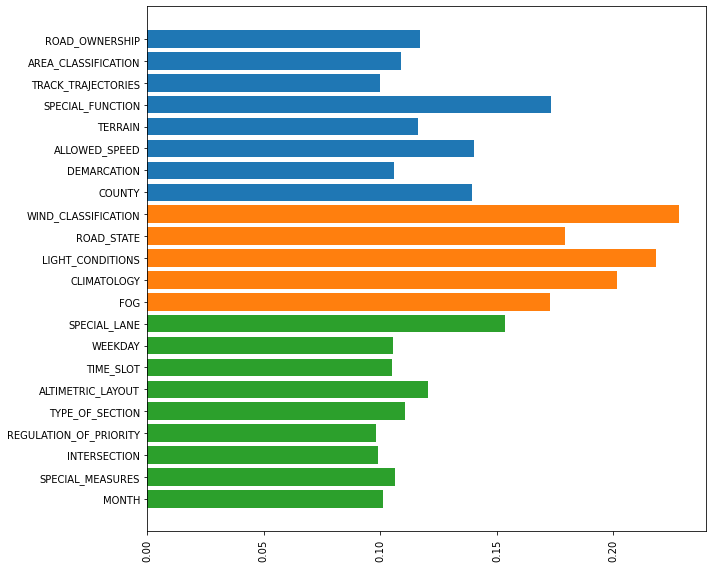

In [19]:
plt.figure(figsize=((10,8)))

plt.barh(circumst_col, w_circumst_max_hazard,color='#2ca02c')
plt.barh(weathcon_col, w_weath_max_hazard,color='#ff7f0e')
plt.barh(roadcon_col, w_road_max_hazard,color='#1f77b4')

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Now we can move on to the last step of this stage. We start from creating additional columns for hazard ratio and removing temporary column *'count'*.

In [20]:
maindf['HAZARD_RATIO_all']=0.
maindf['HAZARD_RATIO_road']=0.
maindf['HAZARD_RATIO_weather']=0.
maindf['HAZARD_RATIO_circumst']=0.

In [21]:
maindf.drop(['count'],axis=1,inplace=True)

Let's proceed the calculation of hazard ratio based on all groups of features.

*It takes some time, so we can just load already calculated csv file below.*

In [22]:
for i in range(maindf.shape[0]):
    for id,item in enumerate(df_col):
        curr_var=maindf[item][i]
        curr_var_coef=norm_hazard_coefs[id].loc[norm_hazard_coefs[id][item] == curr_var]['hazard_coef']
        maindf['HAZARD_RATIO_all'][i] = maindf['HAZARD_RATIO_all'][i] + curr_var_coef

In [23]:
maindf['HAZARD_RATIO_all'].describe()

count    16774.000000
mean         0.818461
std          0.026280
min          0.746372
25%          0.797736
50%          0.811868
75%          0.841576
max          0.908912
Name: HAZARD_RATIO_all, dtype: float64

In [24]:
for i in range(maindf.shape[0]):
    for id,item in enumerate(roadcon_col):
        curr_var=maindf[item][i]
        curr_var_coef=roadcon[id].loc[roadcon[id][item] == curr_var]['hazard_coef']
        maindf['HAZARD_RATIO_road'][i] = maindf['HAZARD_RATIO_road'][i] + curr_var_coef

In [25]:
maindf['HAZARD_RATIO_road'].describe()

count    16774.000000
mean         0.762035
std          0.043874
min          0.690485
25%          0.724107
50%          0.750771
75%          0.800539
max          0.894002
Name: HAZARD_RATIO_road, dtype: float64

In [26]:
for i in range(maindf.shape[0]):
    for id,item in enumerate(weathcon_col):
        curr_var=maindf[item][i]
        curr_var_coef=weathcon[id].loc[weathcon[id][item] == curr_var]['hazard_coef']
        maindf['HAZARD_RATIO_weather'][i] = maindf['HAZARD_RATIO_weather'][i] + curr_var_coef

In [27]:
maindf['HAZARD_RATIO_weather'].describe()

count    16774.000000
mean         0.862335
std          0.018278
min          0.710401
25%          0.855910
50%          0.855910
75%          0.855910
max          0.987172
Name: HAZARD_RATIO_weather, dtype: float64

In [28]:
for i in range(maindf.shape[0]):
    for id,item in enumerate(circumst_col):
        curr_var=maindf[item][i]
        curr_var_coef=circumst[id].loc[circumst[id][item] == curr_var]['hazard_coef']
        maindf['HAZARD_RATIO_circumst'][i] = maindf['HAZARD_RATIO_circumst'][i] + curr_var_coef

In [29]:
maindf['HAZARD_RATIO_circumst'].describe()

count    16774.000000
mean         0.850398
std          0.025637
min          0.772121
25%          0.831962
50%          0.850262
75%          0.871067
max          0.946159
Name: HAZARD_RATIO_circumst, dtype: float64

In the future analysis we'll be using hazard ratio calculated based on road conditions. We can make a histogram for better understanding of the distribution.

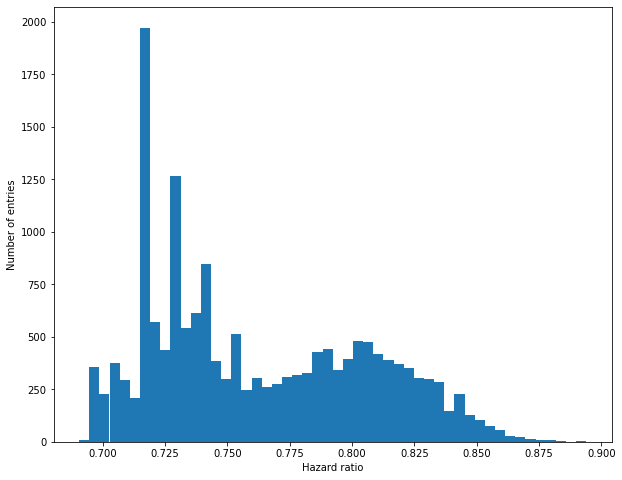

In [30]:
plt.figure(figsize=((10,8)))
n, bins, patches = plt.hist(maindf['HAZARD_RATIO_road'], 50)
plt.xlabel('Hazard ratio')
plt.ylabel('Number of entries')
plt.show()

*Calculated csv file:*

In [32]:
maindf=pd.read_csv("https://raw.githubusercontent.com/secondaryemotion/Coursera_Capstone/master/hazard_ratio_data.csv")

### Methodology: Machine Learning models <a name="models"></a>

We need to create a dataset with only road conditions and road hazard ratios, shuffle the entries and split it into 4 parts.

In [91]:
ML_dataset=maindf[['COUNTY','DEMARCATION','ALLOWED_SPEED','TERRAIN','SPECIAL_FUNCTION','TRACK_TRAJECTORIES','AREA_CLASSIFICATION','ROAD_OWNERSHIP', 'HAZARD_RATIO_road']]
ML_dataset = ML_dataset.sample(frac=1).reset_index(drop=True)
ML_dataset_1 = ML_dataset[:8000]
ML_dataset_2 = ML_dataset[8001:]

Now we proceed label encoding.


In [92]:
features = ML_dataset.columns.drop(['HAZARD_RATIO_road'])

le = preprocessing.LabelEncoder()
for id,item in enumerate(features):
    le.fit(ML_dataset[item])
    ML_dataset_1[item]=le.transform(ML_dataset_1[item])
    ML_dataset_2[item]=le.transform(ML_dataset_2[item])

Hazard ratio is a continious variable, so we can use regression models:
* Linear;
* Ridge; 
* Lasso;
* Random forest;
* Gradient boosting regression.

We'll start from simple linear regression.

In [93]:
x1 = ML_dataset_1.drop(['HAZARD_RATIO_road'],axis=1).values
y1 = ML_dataset_1['HAZARD_RATIO_road'].values
x2 = ML_dataset_2.drop(['HAZARD_RATIO_road'],axis=1).values
y2 = ML_dataset_2['HAZARD_RATIO_road'].values

We'll start from training and testing on first half of dataset.

In [94]:
from sklearn.model_selection import train_test_split

ML1_x_train, ML1_x_test, ML1_y_train, ML1_y_test = train_test_split(x1, y1, test_size=0.2, random_state=4)
print ('Train set:', ML1_x_train.shape,  ML1_y_train.shape)
print ('Test set:', ML1_x_test.shape,  ML1_y_test.shape)

Train set: (6400, 8) (6400,)
Test set: (1600, 8) (1600,)


In [141]:
from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(ML1_x_train, ML1_y_train)

LinearRegression()

Now we can calculate MSE, RMSE, R2-score.

In [143]:
from sklearn.metrics import r2_score
import numpy as np 

yhat1 = regr.predict(ML1_x_test)
print("R2-score: %.2f" % r2_score(yhat1 , ML1_y_test))

R2-score: 0.49


Although R2 score is not that impressive, for the sake of statistics we will continue with the second half of the dataset.

In [144]:
yhat2 = regr.predict(x2)
print("R2-score: %.2f" % r2_score(yhat2 , y2))

R2-score: 0.51


Next step is the Ridge regression. Now we will use the second half of the dataset for training and testing.

In [135]:
from sklearn.linear_model import RidgeCV

ML2_x_train, ML2_x_test, ML2_y_train, ML2_y_test = train_test_split(x2, y2, test_size=0.2, random_state=4)

ridge = RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1])
ridge.fit(ML2_x_train, ML2_y_train)
print("R2-score: %.2f" % ridge.score(ML2_x_test, ML2_y_test))

R2-score: 0.69


Now the same for another half of the dataset.

In [139]:
print("R2-score: %.2f" % ridge.score(x1, y1))

R2-score: 0.67


Lasso regression. We switch parts of the dataset again.

In [138]:
from sklearn.linear_model import LassoCV

lasso = LassoCV(cv=5, random_state=0).fit(ML1_x_train, ML1_y_train)
print("R2-score: %.2f" % lasso.score(ML1_x_test, ML1_y_test))

R2-score: 0.66


Another half.

In [140]:
print("R2-score: %.2f" % lasso.score(x2, y2))

R2-score: 0.67


Random forest regression.

In [156]:
from sklearn.ensemble import RandomForestRegressor

rforest = RandomForestRegressor(max_depth=5, random_state=0)
rforest.fit(ML2_x_train, ML2_y_train)
print("R2-score: %.2f" % rforest.score(ML2_x_test, ML2_y_test))

R2-score: 0.92


In [157]:
print("R2-score: %.2f" % rforest.score(x1, y1))

R2-score: 0.92


Gradient Boosting regression.

In [158]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(random_state=0)
gbr.fit(ML1_x_train, ML1_y_train)
print("R2-score: %.2f" % gbr.score(ML1_x_test, ML1_y_test))

R2-score: 0.98


In [159]:
print("R2-score: %.2f" % gbr.score(x2, y2))

R2-score: 0.98


The best performances are at random forest and gradient boosting regression. We'll use them in further analysis.

### Methodology: Hazard ratio estimation <a name="estimation"></a>

At this step we need to create a dataset of roads and their properties. We'll be using dataset *roaddf* from earlier step.

In [338]:
roaddf_ML=roaddf[['ROAD','COUNTY','DEMARCATION','ALLOWED_SPEED','TERRAIN','SPECIAL_FUNCTION','TRACK_TRAJECTORIES','AREA_CLASSIFICATION','ROAD_OWNERSHIP']]

We will split it into dataframes by different roads. It's a long process, so calculated dataset can be downloaded below.

In [339]:
roads={}
roadlist=roaddf_ML['ROAD'].unique()
for id, item in enumerate(roadlist):
    j=len(roads)
    roads[id]=pd.DataFrame(columns=roaddf_ML.columns)
    for i in range(roaddf_ML.shape[0]):
        if (roaddf_ML['ROAD'][i]==item):
            roads[id].loc[j]=(roaddf_ML.iloc[i].tolist())
            j=j+1

We need to pick roads with only one unique set of features.

In [357]:
roadsdataset=pd.DataFrame(columns=roaddf_ML.columns)
j=0
for id, item in enumerate(roadlist):
    roads[id].drop_duplicates()
    if (roads[id].shape[0]==1):
        roadsdataset.loc[j]=roads[id].iloc[0].tolist()
        j=j+1

*Calculated csv file:*

In [380]:
roadsdataset=pd.read_csv('https://raw.githubusercontent.com/secondaryemotion/Coursera_Capstone/master/roadsdataset.csv', index_col=0)

Now we can predict hazard ratio. Let's proceed label encoding.

In [381]:
r_features = roadsdataset.columns.drop(['ROAD'])

for id,item in enumerate(r_features):
    le.fit(ML_dataset[item])
    roadsdataset[item]=le.transform(roadsdataset[item])
roadsdataset['RF_HAZARD_RATIO']=0.

Random forest regression calculation:

In [386]:
x = roadsdataset.drop(['ROAD','RF_HAZARD_RATIO'],axis=1).values
roadsdataset['RF_HAZARD_RATIO'] = rforest.predict(x)

Gradient boosting regression calculation:

In [388]:
roadsdataset['GB_HAZARD_RATIO']=0.
roadsdataset['GB_HAZARD_RATIO'] = gbr.predict(x)

After predicting hazard ratios, we can proceed label decoding.

In [391]:
for id,item in enumerate(r_features):
    le.fit(ML_dataset[item])
    roadsdataset[item]=le.inverse_transform(roadsdataset[item])

Let's sort the dataset in ascending order of hazard ratio calculated by random forest regression model.

In [399]:
roadsdataset.sort_values(['RF_HAZARD_RATIO'],ascending=True, inplace=True)

Take a look at top-5 least dangerous roads:

In [401]:
roadsdataset[['ROAD','RF_HAZARD_RATIO','GB_HAZARD_RATIO']].head(5)

,ROAD,RF_HAZARD_RATIO,GB_HAZARD_RATIO
74,B-250a,0.718680,0.707151
190,BV-5005,0.721427,0.724435
178,BV-5033,0.726437,0.711195
202,C-149b,0.726437,0.723338
97,BV-2001,0.726934,0.707151


And top-5 most dangerous roads:

In [402]:
roadsdataset[['ROAD','RF_HAZARD_RATIO','GB_HAZARD_RATIO']].tail(5)

,ROAD,RF_HAZARD_RATIO,GB_HAZARD_RATIO
191,GI-514,0.829203,0.829792
30,T-712,0.829203,0.840368
136,TV-3322,0.829203,0.849699
87,T-233,0.829203,0.844988
182,N-1411,0.836906,0.843969


Finally, let's build a histogram.

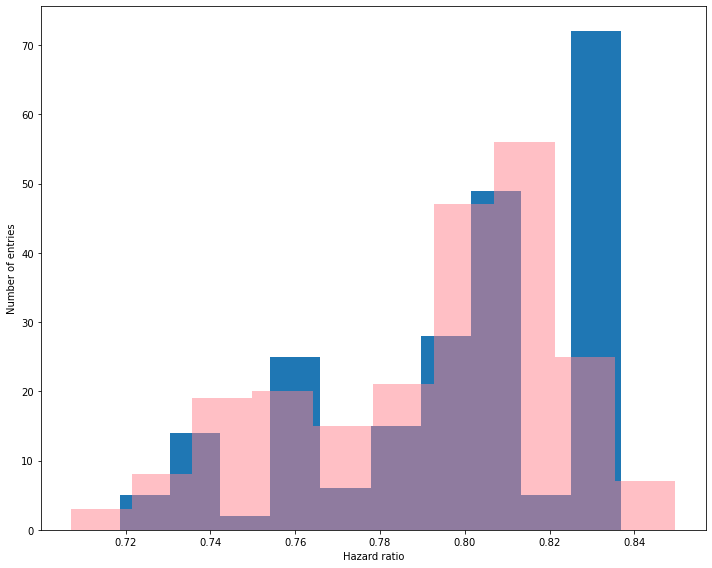

In [414]:
plt.figure(figsize=((10,8)))
n, bins, patches = plt.hist(roadsdataset['RF_HAZARD_RATIO'], 10)
n, bins, patches = plt.hist(roadsdataset['GB_HAZARD_RATIO'], 10, fc=(1, 0.5, 0.55, 0.5))
plt.xlabel('Hazard ratio')
plt.ylabel('Number of entries')
plt.tight_layout()
plt.show()

### Results and Discussion <a name="results"></a>

During the work, hazard ratios were determined for various components such as road conditions, weather conditions and circumstances, based on the dataset of Road accidents in Catalonia. In the presence of a large number of features, their average contribution to the hazard ratio is approximately equal, which confirms the idea that there is no universal way to improve road safety.

At the stage of machine learning, regression models were built to determine the hazard ratio based on road conditions. On average, the hazard ratio was between 0.7 and 0.9. Values less than or equal to 25% were classified as low, 25-75% as medium, and the rest as high.

The most effective were random forest regression and gradient booster regression. They were used to calculate the hazard ratio of specific roads. Based on data on 221 roads, a histogram of hazard ratio values distribution was obtained. Most of the roads are classified as high hazard category.

However, when calculating the hazard ratio of entries, most of the dataset was in the low hazard ratio zone. This is due to the presence of a large number of parts of the same road that have completely different conditions and, subsequently, hazard ratios. It may also be due to the fact that during the calculation of the hazard factor for the entire dataset, all features were used, and, therefore, the weather conditions too. Catalonia has good weather, so the contribution of positive weather conditions could artificially underestimate the hazard ratio.


### Conclusion <a name="conclusion"></a>

The aim of this project was to build a model to determine the hazard ratio of the roads based on certain features. The results showed the need to collect similar data for all roads, and not just for actual accidents, as this way the data becomes negatively biased.

In the course of further use and development of this model, in the case of the availability of suitable datasets, it is possible to generate information on the hazard ratio of all roads in a certain region. Based on the hazard ratio data, it is possible to determine which roads should be paid special attention to over what period of time, which will prevent accidents.